An outline of steps taken to prepare the data to be visualized in the chart, such as:

- What tools did you use for each step? (Python, SQL, Excel, etc)
A:
1.I used SQL to extraxt the data 
1)select * from global_data;
2)select * from city_list left join city_data
on city_list.city = city_data.city
where city_list.country = 'United States' and city_list.city = 'San Jose';

2.Then I used jupyter notebook (Programming language is Python)to do the analysis, here I used pandas and matplotlib.
I used pandas to read the csv file and matplotlib to plot the line chart. 

- How did you calculate the moving average?
A:I used rolling function and set the calculation window to 7, and aggregation function mean.

- What were your key considerations when deciding how to visualize the trends?
A:My key considerations:
1.Chart type: I think line chart is best for showing trends. 

2.Measures: what is my x-axes and what is my y-axes? 
I need to show the trends of the rolling average temperature by year both for local and global, so my x-axes is year and my y-axes is rolling average temperature. 

3.Trend: I plot a linear fit of the data to show the trend (upward or downward)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_city = pd.read_csv('San_Jose_Avg_temp_data.csv')
df_global = pd.read_csv('global_data.csv')

In [3]:
df_city

,city,country,year,city.1,country.1,avg_temp
0,San Jose,United States,1849,San Jose,United States,14.12
1,San Jose,United States,1850,San Jose,United States,13.80
2,San Jose,United States,1851,San Jose,United States,14.39
3,San Jose,United States,1852,San Jose,United States,13.81
4,San Jose,United States,1853,San Jose,United States,14.40
...,...,...,...,...,...,...
160,San Jose,United States,2009,San Jose,United States,15.02
161,San Jose,United States,2010,San Jose,United States,14.67
162,San Jose,United States,2011,San Jose,United States,14.50
163,San Jose,United States,2012,San Jose,United States,15.05


In [4]:
df_global

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
...,...,...
261,2011,9.52
262,2012,9.51
263,2013,9.61
264,2014,9.57


In [5]:
def plot_graph(df, title='', window=15):
    rolling_df = df.rolling(window = window).mean()
    rolling_df.plot(x = 'year', y = 'avg_temp', kind = 'line',figsize = (10,6))
    
    # plot linear fit
    x = rolling_df.dropna()['year'].to_numpy()
    y = rolling_df.dropna()['avg_temp'].to_numpy()
    m,b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)
    
    plt.ylabel(f'{window}yr Rolling Avg Temperature (Celsius)',size = 10)
    plt.xlabel('Year',size = 10)
    plt.title(f'{title} Rolling {window}yr Avg Temperature b/w {int(df.iloc[0]["year"])} and {int(df.iloc[-1]["year"])}')

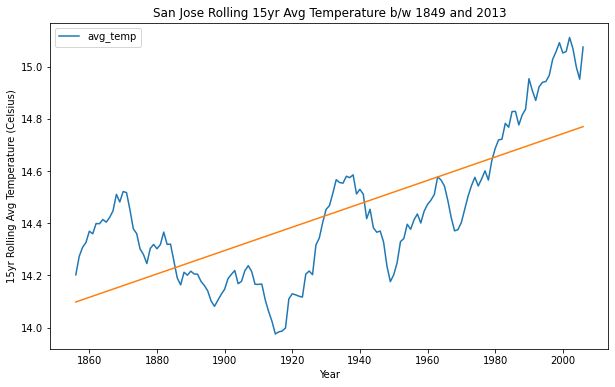

In [6]:
plot_graph(df_city, title='San Jose')

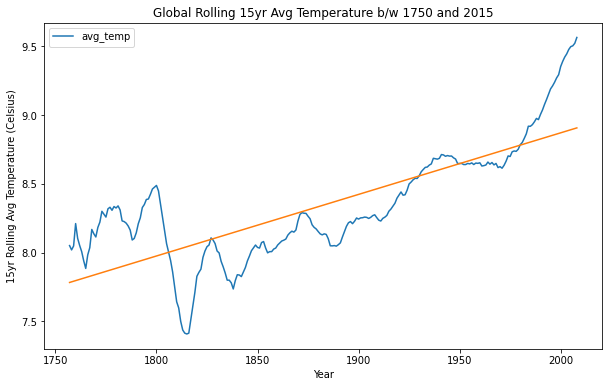

In [7]:
plot_graph(df_global, title='Global')

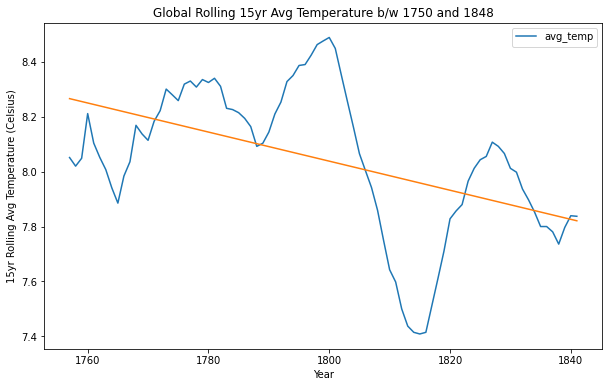

In [8]:
plot_graph(df_global[df_global['year'] < 1849], title='Global')

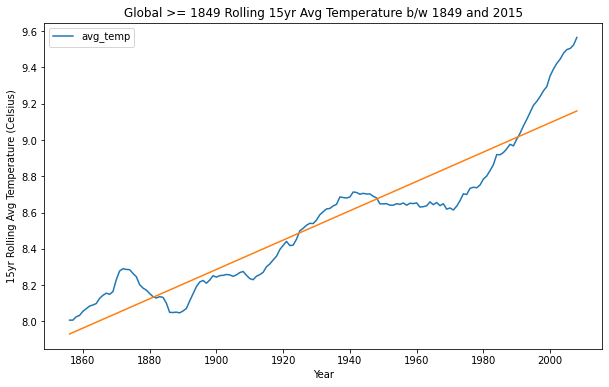

In [9]:
plot_graph(df_global[df_global['year'] >= 1849], title='Global >= 1849')

At least four observations about the similarities and/or differences in the trends

In [10]:
def select_df(df, year_from=0, year_to=2021):
    return df[(df['year'] >= year_from) & (df['year'] <= year_to)]


def change_pct(df):
    first_year = int(df['year'].iloc[0])
    last_year = int(df['year'].iloc[-1])
    
    first = round(df['roll_avg_temp'].iloc[0], 2)
    last = round(df['roll_avg_temp'].iloc[-1], 2)
    
    pct = round((last - first) / first * 100, 2)
    print(f'Between year {first_year} and {last_year}, changed {pct}% from {first} in to {last}')

In [11]:
df_global['roll_avg_temp'] = df_global['avg_temp'].rolling(15, min_periods=1).mean()
df_city['roll_avg_temp'] = df_city['avg_temp'].rolling(15, min_periods=1).mean()

In [12]:

print('15yr rolling avg changes in global')
change_pct(select_df(df_global))
change_pct(select_df(df_global, year_to=1850))
change_pct(select_df(df_global, year_from=1850, year_to=2013))

print('15yr rolling avg changes in san jose')
change_pct(select_df(df_city, year_from=1850))

15yr rolling avg changes in global
Between year 1750 and 2015, changed 9.63% from 8.72 in to 9.56
Between year 1750 and 1850, changed -9.86% from 8.72 in to 7.86
Between year 1850 and 2013, changed 20.87% from 7.86 in to 9.5
15yr rolling avg changes in san jose
Between year 1850 and 2013, changed 8.02% from 13.96 in to 15.08


In [13]:
print('std in global since 1850', round(select_df(df_global, year_from=1850)['avg_temp'].std(), 2))
print('mean in global since 1850', round(select_df(df_global, year_from=1850)['avg_temp'].mean(), 2))


print('std in sj since 1850', round(select_df(df_city, year_from=1850)['avg_temp'].std(), 2))
print('mean in sj since 1850', round(select_df(df_city, year_from=1850)['avg_temp'].mean(), 2))

std in global since 1850 0.47
mean in global since 1850 8.57
std in sj since 1850 0.51
mean in sj since 1850 14.45


# Insights
- Both global and local temperature data show sign of global warming, the plots show upward trends using the linear regression fit. 
- Global temperature is rising faster than San Jose temperature. For global data, 20.87% from 1850 to 2013. For San Jose data, 15yr rolling avg temperature grew 8.02% from 1850 and 2013. 
- San Jose is hotter than global average, with the temperature averaging at 14.45 for SJ and 8.57 for global. 
- San Jose temperature has slightly higher variance than global, with 0.51 SD for San Jose and 0.47 SD for global. 
- Global temperature had a downward trend during 1750 and 1850, decreased by -9.86%. 